In [25]:
#Ajitesh Chauhan 

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, accuracy_score, recall_score, classification_report
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, recall_score, roc_auc_score

In [27]:
data = pd.read_csv("/Users/ajiteshchauhan/Downloads/creditcard.csv")

In [28]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [30]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Text(0,0.5,'Frequency')

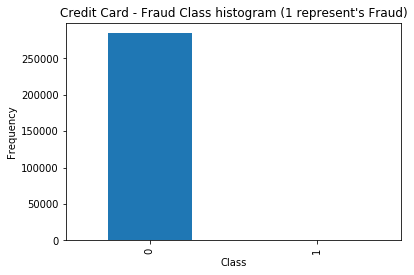

In [31]:
# plotting a histogram to identify the frequency of each type in class
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Credit Card - Fraud Class histogram (1 represent's Fraud)")
plt.xlabel("Class")
plt.ylabel("Frequency")


In [32]:
# Showing ratio(High imbalance)
print("Percentage of non fraud transactions: ", (len(data[data.Class == 0])/len(data))*100)
print("Percentage of fraud transactions: ", (len(data[data.Class == 1])/len(data))*100)
print("Total count of transactions in data: ", len(data))

Percentage of non fraud transactions:  99.82725143693798
Percentage of fraud transactions:  0.1727485630620034
Total count of transactions in data:  284807


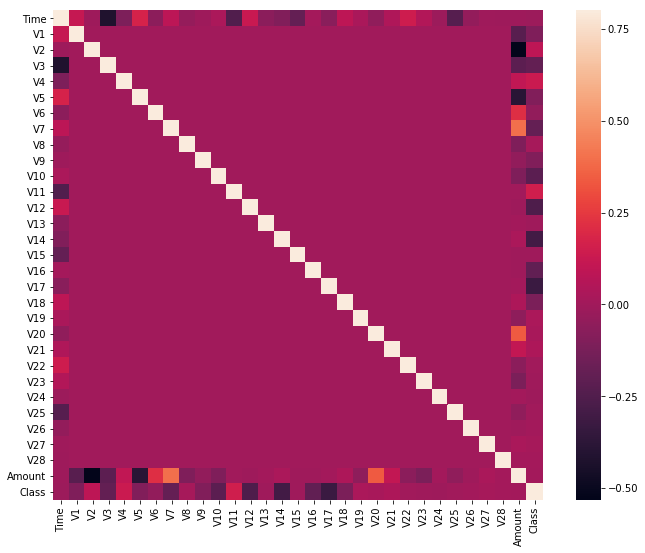

In [33]:
correlation_matrix = data.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix, vmax=0.8, square = True)
plt.show()

In [34]:
X = data.iloc[:, 0:30]
y = data["Class"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify =y, test_size=0.25, random_state=0)

In [36]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
52579,45539.0,-3.347914,-3.361473,1.544786,1.762811,2.669098,-1.163306,-0.894963,0.442753,-0.319186,...,1.537452,0.233390,-0.723999,0.944597,-0.594740,0.680832,-0.363141,-0.129965,0.149183,287.28
104750,69211.0,-2.709431,-0.357075,0.764383,0.077630,-0.103980,-0.374977,-0.816368,0.791849,0.260995,...,-0.398313,0.069553,-0.026616,-0.828865,-0.316275,-0.500448,0.084505,-0.285052,-0.328693,15.95
138946,82932.0,-1.043819,-0.296518,0.306696,-2.191146,1.281874,-0.340129,1.069963,0.032010,0.094097,...,0.331988,-0.125172,-0.751551,0.258923,-1.210583,0.008129,-1.144667,0.080121,0.137747,136.38
254495,156757.0,-1.799744,-2.285001,-0.523871,-1.267247,1.618784,-0.791609,-1.090698,0.516999,-0.665132,...,0.706115,0.674089,1.182007,-0.509206,-0.183312,0.930281,0.308974,-0.121150,-0.455961,52.00
251981,155597.0,1.998482,-0.249065,-1.253748,0.224398,0.041799,-0.589313,0.026386,-0.092081,0.437735,...,-0.221096,-0.255588,-0.718920,0.277660,-0.488993,-0.327426,0.209093,-0.081484,-0.073040,22.24


In [37]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:

print(classification_report(y_test,predictions))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.70      0.55      0.62       123

   micro avg       1.00      1.00      1.00     71202
   macro avg       0.85      0.78      0.81     71202
weighted avg       1.00      1.00      1.00     71202



In [39]:
predictions = logmodel.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
area = auc(recall, precision)

print('------------ Results for LogisticRegression ---------------')
print('cm:', confusion_matrix(y_test,predictions))
#print('cr:', classification_report(y_test,y_pred))
print('recall_score:', recall_score(y_test,predictions))
print('roc_auc_score:',roc_auc_score(y_test,predictions))
print("Area Under P-R Curve: ",area)
from sklearn.metrics import precision_score
precision_baseline = float('%.3f' % precision_score(y_test, predictions))
print('Precision Score:', precision_baseline)
accuracy_baseline = float('%.3f' % accuracy_score(y_test, predictions))
print('Accuracy Score:', accuracy_baseline)

------------ Results for LogisticRegression ---------------
cm: [[71050    29]
 [   55    68]]
recall_score: 0.5528455284552846
roc_auc_score: 0.7762187658596292
Area Under P-R Curve:  0.6273244532512043
Precision Score: 0.701
Accuracy Score: 0.999


In [40]:
#using SMOTE for upsampling minority class, chosen post checkin results with under_sampling as up-sampling gives better result

In [41]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [42]:
logmodel.fit(x_train_res,y_train_res)
predictions = logmodel.predict(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
area = auc(recall, precision)
print('roc_auc_score:',roc_auc_score(y_test,predictions))
print("Area Under P-R Curve: ",area)

roc_auc_score: 0.9341557092606337
Area Under P-R Curve:  0.4827091350527523


In [44]:
predictions = logmodel.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
area = auc(recall, precision)

print('------------ Results for LogisticRegression ---------------')
print('cm:', confusion_matrix(y_test,predictions))
#print('cr:', classification_report(y_test,y_pred))
print('recall_score:', recall_score(y_test,predictions))
print('roc_auc_score:',roc_auc_score(y_test,predictions))
print("Area Under P-R Curve: ",area)
from sklearn.metrics import precision_score
precision_baseline = float('%.3f' % precision_score(y_test, predictions))
print('Precision Score:', precision_baseline)
accuracy_baseline = float('%.3f' % accuracy_score(y_test, predictions))
print('Accuracy Score:', accuracy_baseline)

------------ Results for LogisticRegression ---------------
cm: [[69809  1270]
 [   14   109]]
recall_score: 0.8861788617886179
roc_auc_score: 0.9341557092606337
Area Under P-R Curve:  0.4827091350527523
Precision Score: 0.079
Accuracy Score: 0.982


In [45]:
#RANDOM FOREST

In [46]:
clf = RandomForestClassifier(n_estimators=100)    
clf.fit(x_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
predictions = clf.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
area = auc(recall, precision)

print('------------ Results for RandomForestClassifier ---------------')
print('cm:', confusion_matrix(y_test,predictions))
#print('cr:', classification_report(y_test,y_pred))
print('recall_score:', recall_score(y_test,predictions))
print('roc_auc_score:',roc_auc_score(y_test,predictions))
print("Area Under P-R Curve: ",area)
from sklearn.metrics import precision_score
precision_baseline = float('%.3f' % precision_score(y_test, predictions))
print('Precision Score:', precision_baseline)

------------ Results for RandomForestClassifier ---------------
cm: [[71069    10]
 [   23   100]]
recall_score: 0.8130081300813008
roc_auc_score: 0.9064337207758183
Area Under P-R Curve:  0.8612110319031747
Precision Score: 0.909


In [48]:

#AUPRC is ideal for evaluation here as the class is highly imbalanced


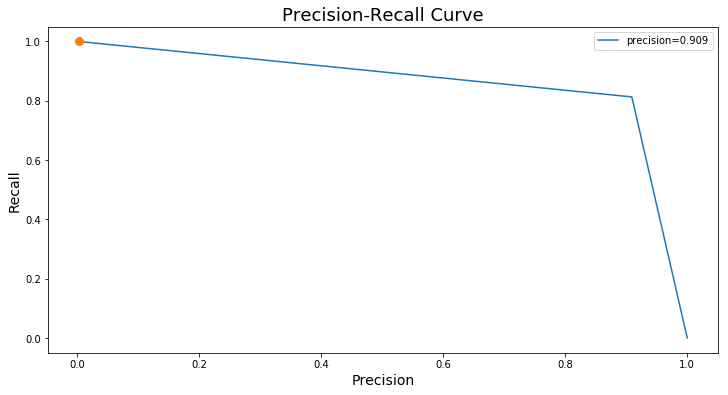

In [49]:
#precision-recall curve
fig, (ax1) = plt.subplots(1,figsize = (12,6))
precision, recall, thresholds_pr = precision_recall_curve(y_test, predictions)
avg_pre = precision_baseline#average_precision_score(y_test, predictions)
ax1.plot(precision, recall, label ="precision={}".format(precision_baseline))# i+ " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.7)
ax1.set_xlabel('Precision', fontsize = 14)
ax1.set_ylabel('Recall', fontsize = 14)
ax1.set_title('Precision-Recall Curve', fontsize = 18)
ax1.legend(loc = 'best')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_pr - 0.5))
ax1.plot(precision[close_default], recall[close_default], 'o', markersize = 8)



In [50]:
#AdaBoostClassifier

In [51]:
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(x_train_res,y_train_res)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9916856268082357

In [52]:
predictions = clf.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, predictions)
area = auc(recall, precision)

print('------------ Results for AdaBOOST---------------')
print('cm:', confusion_matrix(y_test,predictions))
#print('cr:', classification_report(y_test,y_pred))
#print('recall_score:', recall_score(y_test,y_pred))
print('roc_auc_score:',roc_auc_score(y_test,predictions))
print("Area Under P-R Curve: ",area)

------------ Results for AdaBOOST---------------
cm: [[70508   571]
 [   21   102]]
roc_auc_score: 0.9106174888195512
Area Under P-R Curve:  0.4905617032622687


In [53]:
#Randomtree Classifier gives the best result